Problem 1


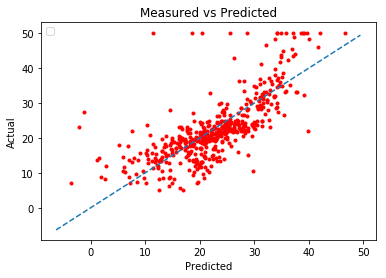

The average prediction error is 39.7573802769

Problem 2


In [103]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

def changeFormat(XOld, yOld):
    # Add a column of 1's to Xold and call it X
    mOld, nOld = XOld.shape
    X = np.ones( (mOld, nOld + 1) )
    X[:, :-1] = XOld
    
    # Turn y into a column matrix
    y = np.matrix(yOld).T
    
    return X, y

def LSTrain(X, y):
    # Calculate w = (X^tX)^{-1}X^tY and return it
    w = np.matmul(
            np.linalg.inv(np.matmul(X.T, X)),
            np.matmul(X.T, y)
    )
    return w

def RRTrain(X, y, L):
    # Calculate Xmult = X^tX + L*I
    Xmult = np.matmul(X.T, X)
    for i in range(Xmult.shape[0]):
        Xmult[i][i] += L
        
    # Calculate w = (X^tX + L*I)^{-1}X^tY and return it
    w = np.matmul(
            np.linalg.inv(Xmult),
            np.matmul(X.T, y)
    )
    
    return w

def makeScatterPlot(title, pointsLists, colors, markers, xlabel = '', ylabel = ''):
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
     
    for i, pointsList in enumerate(pointsLists):
        currColor = colors[i]
        currMarker = markers[i]
        for point in pointsList:
            x, y = point
            ax.scatter(x, y, c=currColor, marker=currMarker)
        
    # Temporary, add line
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = 0 + 1 * x_vals
    plt.plot(x_vals, y_vals, '--')
        
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=2)
    plt.show()


def calcError(y1, y2):
    return (y1 - y2) ** 2

def performValidation(k, X, y, trainFunc, plotDiffs = False):
    # Set things up
    table = {}
    for i, row in enumerate(X):
        table[str(row)] = y[i]
    predTable = {}
    
    # Split X up into folds
    stepSize = int(X.shape[0] / k) + 1
    steps = [min(X.shape[0], stepSize * n) for n in range(1, k)]
    folds = np.split(X, steps)
    foldLabels = np.split(y, steps)
    
    # For each fold i, use i as testing, and use all the other
    # i - 1 folds for training. Calculate the errors for each and store
    # them in avgErrors
    avgErrors = []
    for i, currFold in enumerate(folds):
        
        # Get XTrain and yTrain with all the other folds except currFold
        otherFolds = [otherFold for j, otherFold in enumerate(folds) if j != i]
        otherFoldLabels = [label for j, label in enumerate(foldLabels) if j != i]
        XTrain = otherFolds[0]
        yTrain = otherFoldLabels[0]
        for j in range(1, len(otherFolds)):
            XTrain = np.append(XTrain, otherFolds[j], axis=0)
            yTrain = np.append(yTrain, otherFoldLabels[j], axis=0)
        
        # Actually get the wTrain values using the given trainFunc
        wTrain = trainFunc(XTrain, yTrain)
    
        # Now, evaluate the trained model against the actual labels,
        # keep track of total error!
        
        totalError = 0
        for row in currFold:
            yPredicted = np.matmul(wTrain.T, row)
            totalError += calcError(yPredicted[0,0], table[str(row)][0,0])
            
            predTable[str(row)] = yPredicted
            
        totalError /= len(currFold)
        avgErrors.append(totalError)
        
    plotPoints = []
    for row in X:
        hashVal = str(row)
        plotPoints.append( (predTable[hashVal][0,0], table[hashVal][0,0]) )
        
    # print plotPoints
    # Optionally, plot the measured vs predicted values
    if plotDiffs:
        title = "Measured vs Predicted"
        pointsLists = [plotPoints]
        colors = ['r']
        markers = ['.']
        xlabel = 'Predicted'
        ylabel = 'Actual'
        makeScatterPlot(title, 
                        pointsLists, 
                        colors, 
                        markers,
                        xlabel,
                        ylabel)

    
    return avgErrors
    
def problem1():
    print "Problem 1"
    k = 5
    X, y = changeFormat(*load_boston(return_X_y = True))
    w = LSTrain(X, y)
    
    avgErrors = performValidation(k, X, y, LSTrain, plotDiffs = True)
    finalAvgError = np.mean(avgErrors)
    print "The average prediction error is {}".format(finalAvgError)
    # print y
    
def problem2():
    print "Problem 2"
    
problem1()
print ""
problem2()